
# Transfer Learning

In [154]:
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn.preprocessing import Normalizer
import keras
from keras import callbacks,models
from keras.callbacks import CSVLogger
from keras.utils import to_categorical
import cv2
from keras.models import Sequential,model_from_json
from keras.layers.convolutional import Convolution1D, MaxPooling1D
from keras.layers import Flatten,Dense,Dropout
from sklearn.metrics import confusion_matrix
import sklearn
from sklearn.model_selection import train_test_split
from pandas import DataFrame
from keras.models import load_model
import sklearn.metrics

In [78]:
normal=pd.read_csv('ptbdb_normal.csv',header=None)
abnormal=pd.read_csv('ptbdb_abnormal.csv',header=None)

In [79]:
train_normal=normal.iloc[:,0:186]
label_normal=normal.iloc[:,187]
train_abnormal=abnormal.iloc[:,0:186]
label_abnormal=abnormal.iloc[:,187]

In [80]:
scaler1= Normalizer().fit(normal)
train_normal = scaler1.transform(train_normal)

scaler2= Normalizer().fit(abnormal)
train_abnormal = scaler2.transform(train_abnormal)

In [81]:
x_train_n,x_test_n,y_train_n,y_test_n=train_test_split(train_normal,label_normal,test_size=0.2)
x_train_ab,x_test_ab,y_train_ab,y_test_ab=train_test_split(train_abnormal,label_abnormal,test_size=0.2)

In [129]:
x_train1=np.concatenate([x_train_n,x_train_ab], axis=0)
x_test1=np.concatenate([x_test_n,x_test_ab], axis=0)
y_train1=np.concatenate([y_train_n,y_train_ab], axis=0)
y_test1=np.concatenate([y_test_n,y_test_ab], axis=0)

In [130]:
x_train1=np.array(x_train1)
x_test1=np.array(x_test1)

x_train1=np.reshape(x_train1,(x_train1.shape[0],x_train1.shape[1],1))
x_test1=np.reshape(x_test1,(x_test1.shape[0],x_test1.shape[1],1))
x_train1.shape

(11640, 186, 1)

In [131]:
y_expected=y_test1

y_train = to_categorical(y_train1)
y_test = to_categorical(y_test1)
y_train.shape

(11640, 2)

In [132]:
model=load_model("checkpoint-01.hdf5")

In [133]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_2 (Conv1D)            (None, 186, 64)           256       
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 93, 64)            0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 5952)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               761984    
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 5)                 645       
Total params: 762,885
Trainable params: 762,885
Non-trainable params: 0
_________________________________________________________________


In [134]:
for layer in model.layers[:-3]:
    layer.trainable=False

In [135]:
for layer in model.layers:
    print(layer,layer.trainable)

<keras.layers.convolutional.Conv1D object at 0x0000022EC915D080> False
<keras.layers.pooling.MaxPooling1D object at 0x0000022EC915D4E0> False
<keras.layers.core.Flatten object at 0x0000022EC915D4A8> False
<keras.layers.core.Dense object at 0x0000022ED9AD3828> True
<keras.layers.core.Dropout object at 0x0000022ED9AF26A0> True
<keras.layers.core.Dense object at 0x0000022ED9AF2780> True


In [136]:
model1=Sequential()
model1.add(model)

model1.add(Dense(2,activation="sigmoid"))

In [137]:
model1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_2 (Sequential)    (None, 5)                 762885    
_________________________________________________________________
dense_10 (Dense)             (None, 2)                 12        
Total params: 762,897
Trainable params: 762,641
Non-trainable params: 256
_________________________________________________________________


In [138]:
model1.compile(loss="binary_crossentropy",optimizer="adam",metrics=['accuracy'])

In [141]:
checkpointer = callbacks.ModelCheckpoint(filepath='checkpoint_myocardial-{epoch:02d}.hdf5', verbose=1, save_best_only=True, monitor='loss')
csv_logger = CSVLogger('cnntrainanalysis1_myocardial.csv', separator=',', append=False)
model1.fit(x_train,y_train, nb_epoch=1, callbacks=[checkpointer,csv_logger])
model1.save('model1_myocardial.hdf5')

Epoch 1/1
  320/11640 [..............................] - ETA: 6s - loss: 0.4404 - acc: 0.8859

C:\Users\Silpa\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  app.launch_new_instance()


11640/11640 [==============================] - 7s 561us/step - loss: 0.4346 - acc: 0.8523

Epoch 00001: loss improved from inf to 0.43464, saving model to checkpoint_myocardial-01.hdf5


In [142]:
y_pred = model1.predict_classes(x_test)

np.savetxt('expected1.txt',y_expected, fmt='%01d')
np.savetxt('predicted1.txt', y_pred, fmt='%01d')

model1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
loss, accuracy= model1.evaluate(x_test,y_test)

print('\nLoss: %.2f, Accuracy: %.2f%%' %(loss,accuracy*100) )

2912/2912 [==============================] - 1s 275us/step

Loss: 0.39, Accuracy: 88.08%


In [143]:
from sklearn.metrics import accuracy_score,precision_score,f1_score,recall_score,confusion_matrix

accuracy=accuracy_score(y_expected,y_pred)
precision=precision_score(y_expected,y_pred, average=None)
recall=recall_score(y_expected,y_pred, average=None)
f1=f1_score(y_expected,y_pred, average=None)

print('Acuuracy=',accuracy)
print('precision=',accuracy)
print('Recall=',accuracy)
print('f1_score=',accuracy)

Acuuracy= 0.8808379120879121
precision= 0.8808379120879121
Recall= 0.8808379120879121
f1_score= 0.8808379120879121


In [150]:
import sklearn.metrics
A=precision_score(y_expected,y_pred, average=None)
A

array([0.77, 0.92])

In [148]:
y_pred
y_test
mat=confusion_matrix(y_test1,y_pred)
mat=pd.DataFrame(mat)

Automatically created module for IPython interactive environment
Confusion matrix, without normalization
[[ 655  155]
 [ 192 1910]]
Normalized confusion matrix
[[0.81 0.19]
 [0.09 0.91]]


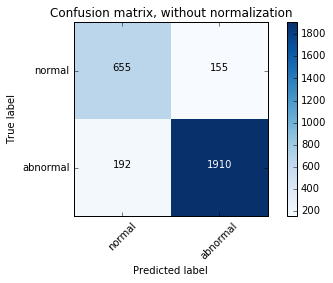

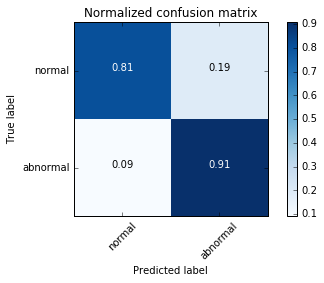

In [155]:
print(__doc__)

import itertools
import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test1, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['normal','abnormal'],
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['normal','abnormal'], normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [156]:
from sklearn.metrics import classification_report
sklearn.metrics.classification_report(y_test1, y_pred)
target_names = ['normal', 'abnormal']
print(classification_report(y_test1, y_pred, target_names=target_names))

             precision    recall  f1-score   support

     normal       0.77      0.81      0.79       810
   abnormal       0.92      0.91      0.92      2102

avg / total       0.88      0.88      0.88      2912



In [157]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test1,y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)


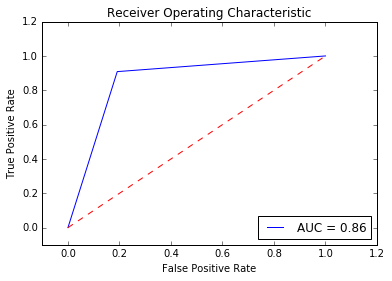

In [158]:
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate, 'b', label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()